#AI-CA5-P2 - Mohammad Hosein Aghili - 810199576

##part 0:

In [1]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# print(train_images)


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# plt.imshow(train_images[755])


In [ ]:
# print(train_labels[755])

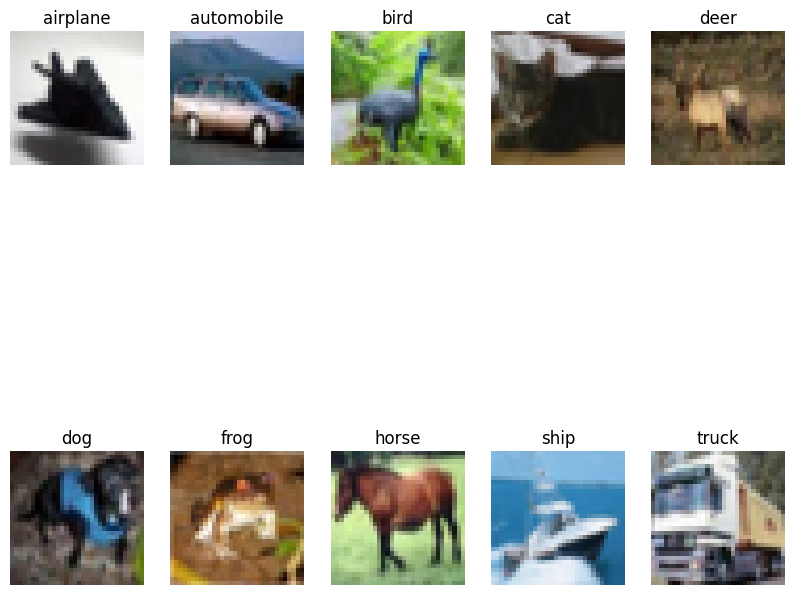

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    image = train_images[np.argmax(train_labels == i)]
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(class_names[i])
    plt.axis('off')
plt.show()




In [3]:

train_counts = np.bincount(train_labels.flatten())
test_counts = np.bincount(test_labels.flatten())
for i in range(len(class_names)):
    print(f"Train {class_names[i]}: {train_counts[i]}")
    print(f"Test {class_names[i]}: {test_counts[i]}")


Train airplane: 5000
Test airplane: 1000
Train automobile: 5000
Test automobile: 1000
Train bird: 5000
Test bird: 1000
Train cat: 5000
Test cat: 1000
Train deer: 5000
Test deer: 1000
Train dog: 5000
Test dog: 1000
Train frog: 5000
Test frog: 1000
Train horse: 5000
Test horse: 1000
Train ship: 5000
Test ship: 1000
Train truck: 5000
Test truck: 1000


In [4]:
# Normalize the pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
# print(train_images)
# print(train_labels)

In [5]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
num_classes = len(class_names)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


In [ ]:
# print(train_labels)

##part 1:

**how the Adam optimizer works and how it differs from the SGD optimizer:**

  1- Adaptive Learning Rates:
  The Adam optimizer adapts the learning rate for each parameter individually based on their past gradients. It maintains a separate learning rate per parameter, allowing it to update parameters with larger or smaller steps depending on their importance.
  In contrast, the SGD optimizer uses a fixed learning rate throughout the training process, which may not be optimal for different parameters or different stages of training.

  2-Momentum:

  Like the SGD optimizer, the Adam optimizer also incorporates the concept of momentum. Momentum helps accelerate the convergence of the optimization process by accumulating past gradients and using them to influence the current update step.
  However, the Adam optimizer utilizes a more sophisticated form of momentum that takes into account both the first moment (mean) and the second moment (uncentered variance) of the gradients. This allows for more robust updates, especially in the presence of noisy or sparse gradients.
  
  3-Bias Correction:

  The Adam optimizer performs bias correction to address bias introduced in the estimation of the first and second moments of the gradients, particularly in the early stages of training when the gradient estimates are less accurate.
  The bias correction is applied to the estimates of the mean and the uncentered variance to ensure the optimizer starts with unbiased estimates.


---



**Compared to the SGD optimizer, which uses a fixed learning rate for all parameters and a simpler momentum approach, the Adam optimizer generally converges faster and can handle a wider range of optimization challenges. However, the choice of optimizer depends on the specific problem, and it's often beneficial to experiment with different optimizers to find the best one for a given task.**

In [6]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


In [8]:
def plot_metrics(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Epoch 1/20
1563/1563 [==============================] - 23s 7ms/step - loss: 1.3441 - accuracy: 0.5167 - val_loss: 1.0400 - val_accuracy: 0.6344
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8788 - accuracy: 0.6912 - val_loss: 0.8171 - val_accuracy: 0.7186
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6876 - accuracy: 0.7599 - val_loss: 0.7686 - val_accuracy: 0.7373
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5496 - accuracy: 0.8081 - val_loss: 0.7425 - val_accuracy: 0.7469
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4225 - accuracy: 0.8532 - val_loss: 0.8006 - val_accuracy: 0.7476
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3033 - accuracy: 0.8938 - val_loss: 0.8836 - val_accuracy: 0.7510
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2164 - accuracy: 0.9236 - val_loss: 1.0851 - val_accura

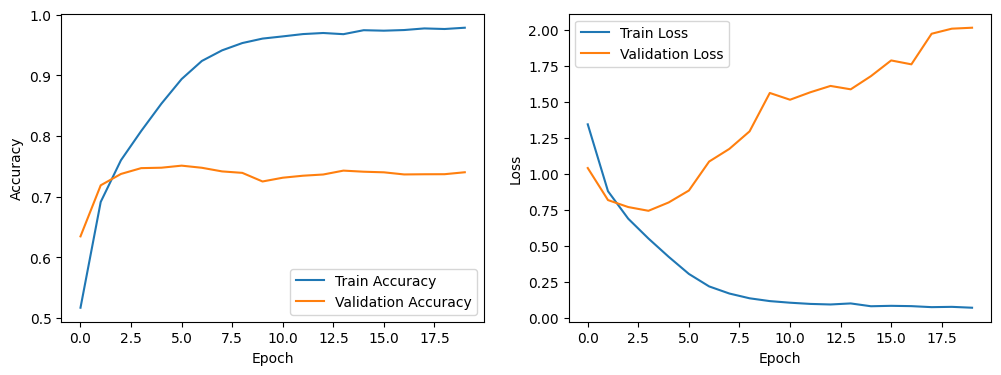

In [9]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))
plot_metrics(history)


In [10]:
# print(test_labels)
# print(test_images)

In [11]:
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
test_labels = np.argmax(test_labels, axis=1)

report = classification_report(test_labels, y_pred_labels)
print(report)


313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.83      0.87      0.85      1000
           2       0.64      0.63      0.63      1000
           3       0.55      0.58      0.56      1000
           4       0.74      0.66      0.70      1000
           5       0.67      0.62      0.64      1000
           6       0.80      0.80      0.80      1000
           7       0.77      0.81      0.79      1000
           8       0.82      0.84      0.83      1000
           9       0.83      0.81      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



##Part 2:

In [ ]:
# print(len(train_labels))

In [22]:
(train2_images, train2_labels), (test2_images, test2_labels) = cifar10.load_data()


In [ ]:
# print(len(train2_images))
# print(len(train2_labels))

randomly choose 80% of class 0 and 1 and delete it from our train data and labels:

In [24]:


class_indices = [0, 1]

class_0_indices = np.where(train2_labels == class_indices[0])[0]
class_1_indices = np.where(train2_labels == class_indices[1])[0]

np.random.shuffle(class_0_indices)
np.random.shuffle(class_1_indices)

desired_samples = int(0.8 * min(len(class_0_indices), len(class_1_indices)))

selected_class_0_indices = class_0_indices[:desired_samples]
selected_class_1_indices = class_1_indices[:desired_samples]

filtered_train_images = np.delete(train2_images, np.concatenate((selected_class_0_indices, selected_class_1_indices)), axis=0)
filtered_train_labels = np.delete(train2_labels, np.concatenate((selected_class_0_indices, selected_class_1_indices)), axis=0)


In [ ]:
# print(len(filtered_train_images))
# print(len(filtered_train_labels))

In [14]:

num_classes = 10
filtered_train_labels = to_categorical(filtered_train_labels, num_classes)
filtered_train_images = filtered_train_images / 255.0
test2_images = test2_images / 255.0
test2_labels = to_categorical(test2_labels, num_classes)


In [15]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=filtered_train_images.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


In [16]:
def plot_metrics2(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)


Epoch 1/20
1313/1313 [==============================] - 11s 7ms/step - loss: 1.3690 - accuracy: 0.5062 - val_loss: 1.1907 - val_accuracy: 0.5665
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.9537 - accuracy: 0.6652 - val_loss: 1.0616 - val_accuracy: 0.6383
Epoch 3/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.7519 - accuracy: 0.7340 - val_loss: 0.8660 - val_accuracy: 0.6962
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5973 - accuracy: 0.7882 - val_loss: 0.9163 - val_accuracy: 0.6948
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4610 - accuracy: 0.8380 - val_loss: 0.9042 - val_accuracy: 0.7165
Epoch 6/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3388 - accuracy: 0.8804 - val_loss: 1.1244 - val_accuracy: 0.6956
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2415 - accuracy: 0.9145 - val_loss: 1.3230 - val_accuracy

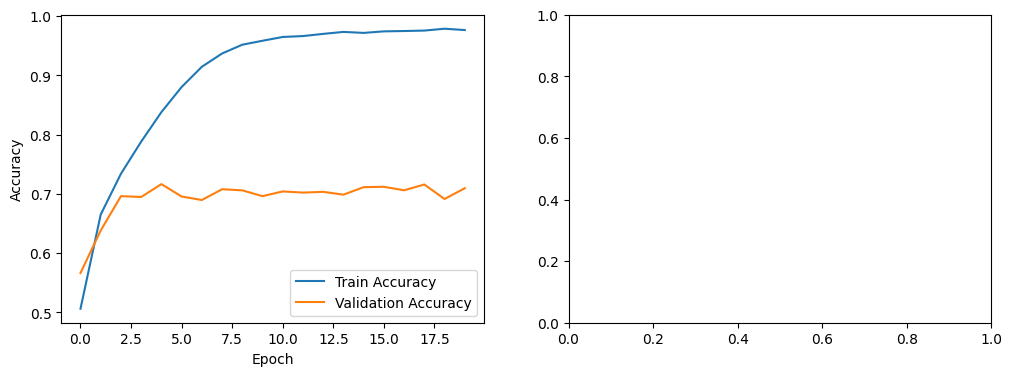

In [17]:

history2 = model2.fit(filtered_train_images, filtered_train_labels, batch_size=32, epochs=20, validation_data=(test2_images, test2_labels))

plot_metrics2(history2)

from sklearn.metrics import classification_report

predictions = model2.predict(test2_images)
predicted_labels = np.argmax(predictions, axis=1)


In [ ]:
# print(len(test2_images),len(test2_labels))
# print(test2_labels)

In [19]:
# predicted_labels = np.argmax(predictions, axis=1)
# report = classification_report(predictions, predicted_labels)
# print(report)

##Part 3:

In [27]:
# print(len(train2_images))
# print(len(train2_labels))
# print(len(filtered_train_images))
# print(len(filtered_train_labels))
# print(len(augmented_images))
# print(len(augmented_labels))




In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True,  
    zoom_range=0.2 
)

augmented_images = []
augmented_labels = []
class_indices = [0, 1] 

for i in class_indices:
    class_samples = train2_images[train2_labels.flatten() == i]
    num_samples = len(class_samples)
    
    for j in range(num_samples):
        image = class_samples[j]
        image = image.reshape((1,) + image.shape) 
        augmented_images.extend(datagen.flow(image, batch_size=1)[0])
        augmented_labels.append(i)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels) 
augmented_labels = np.expand_dims(augmented_labels, axis=1) #conver to 1D

filtered_train_images = np.concatenate((filtered_train_images, augmented_images), axis=0)
filtered_train_labels = np.concatenate((filtered_train_labels, augmented_labels), axis=0)



In [28]:

num_classes = 10
filtered_train_labels = to_categorical(filtered_train_labels, num_classes)
filtered_train_images = filtered_train_images / 255.0
test2_images = test2_images / 255.0
test2_labels = to_categorical(test2_labels, num_classes)


In [ ]:
# test2_labels = to_categorical(test2_labels, num_classes)

In [30]:
# print(filtered_train_labels)
# print(filtered_train_images)
# print(test2_images)
# print(test2_labels)

In [31]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


In [32]:
def plot_metrics(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Epoch 1/20
1625/1625 [==============================] - 11s 6ms/step - loss: 1.4025 - accuracy: 0.4980 - val_loss: 1.1411 - val_accuracy: 0.5900
Epoch 2/20
1625/1625 [==============================] - 9s 5ms/step - loss: 0.9630 - accuracy: 0.6620 - val_loss: 0.9999 - val_accuracy: 0.6580
Epoch 3/20
1625/1625 [==============================] - 9s 6ms/step - loss: 0.7582 - accuracy: 0.7354 - val_loss: 0.9080 - val_accuracy: 0.6987
Epoch 4/20
1625/1625 [==============================] - 9s 5ms/step - loss: 0.6270 - accuracy: 0.7833 - val_loss: 0.8413 - val_accuracy: 0.7147
Epoch 5/20
1625/1625 [==============================] - 9s 5ms/step - loss: 0.5051 - accuracy: 0.8227 - val_loss: 0.8611 - val_accuracy: 0.7235
Epoch 6/20
1625/1625 [==============================] - 9s 5ms/step - loss: 0.3954 - accuracy: 0.8608 - val_loss: 0.9885 - val_accuracy: 0.7186
Epoch 7/20
1625/1625 [==============================] - 9s 5ms/step - loss: 0.3043 - accuracy: 0.8927 - val_loss: 1.0207 - val_accuracy

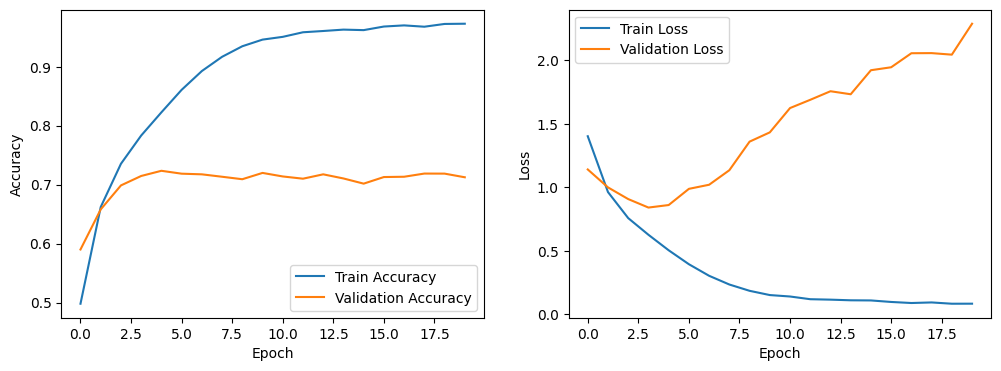

In [33]:
history3 = model3.fit(filtered_train_images, filtered_train_labels, batch_size=32, epochs=20, validation_data=(test2_images, test2_labels))
plot_metrics(history3)


In [ ]:
# print(test2_labels)
# # print(test2_images)

In [34]:
y_pred = model3.predict(test2_images)
y_pred_labels = np.argmax(y_pred, axis=1)
test2_labels = np.argmax(test2_labels, axis=1)

report = classification_report(test2_labels, y_pred_labels)
print(report)


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.74      0.83      0.78      1000
           2       0.68      0.56      0.62      1000
           3       0.52      0.52      0.52      1000
           4       0.66      0.73      0.69      1000
           5       0.60      0.64      0.62      1000
           6       0.72      0.84      0.77      1000
           7       0.82      0.79      0.80      1000
           8       0.83      0.81      0.82      1000
           9       0.77      0.82      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



##part 4:

In [36]:
# print(len(train_images))
# print((train_labels))
# test_labels = to_categorical(test_labels, num_classes)
# print(test_labels)
# print(test_images)

In [37]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3)))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

model4.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])




In [42]:
# print(train_images)
# print((train_labels))


Epoch 1/20
1563/1563 [==============================] - 18s 9ms/step - loss: 1.5275 - accuracy: 0.4885 - val_loss: 1.1650 - val_accuracy: 0.5933
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0165 - accuracy: 0.6419 - val_loss: 1.4154 - val_accuracy: 0.5577
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8922 - accuracy: 0.6890 - val_loss: 0.7856 - val_accuracy: 0.7205
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8048 - accuracy: 0.7196 - val_loss: 0.7074 - val_accuracy: 0.7519
Epoch 5/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7287 - accuracy: 0.7479 - val_loss: 0.6699 - val_accuracy: 0.7688
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6855 - accuracy: 0.7619 - val_loss: 0.6524 - val_accuracy: 0.7761
Epoch 7/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.6349 - accuracy: 0.7791 - val_loss: 0.5966 - val_ac

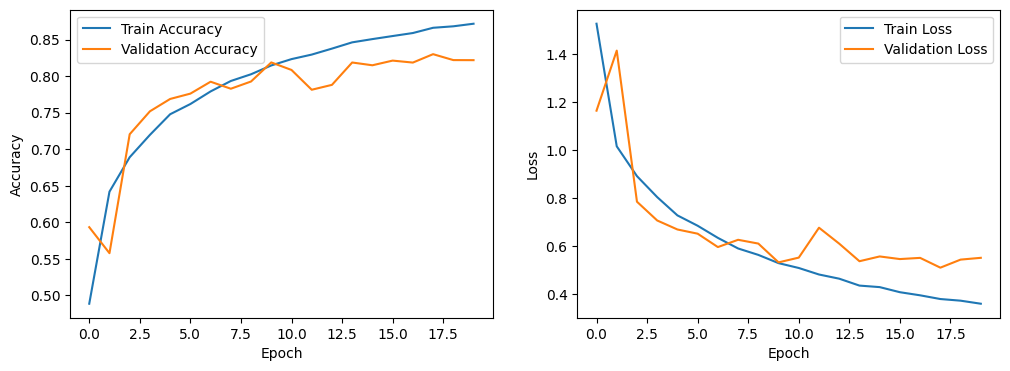

In [40]:
history = model4.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))
plot_metrics(history)

In [41]:
y_pred = model4.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
test_labels = np.argmax(test_labels, axis=1)

report = classification_report(test2_labels, y_pred_labels)
print(report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       0.92      0.92      0.92      1000
           2       0.80      0.69      0.74      1000
           3       0.72      0.61      0.66      1000
           4       0.75      0.83      0.79      1000
           5       0.70      0.82      0.75      1000
           6       0.76      0.93      0.84      1000
           7       0.90      0.86      0.88      1000
           8       0.91      0.89      0.90      1000
           9       0.92      0.86      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



** we can see that the model with Dropout and BatchNormalization outperforms the model without them in terms of precision, recall, and f1-score for most classes. The overall accuracy of the model also increased from 74% to 82%. This indicates that the inclusion of Dropout and BatchNormalization layers has helped the model generalize better and improve its performance on the test dataset.**